In [1]:
import pandas as pd
import numpy
df=pd.read_csv("gender-classifier.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


<AxesSubplot:>

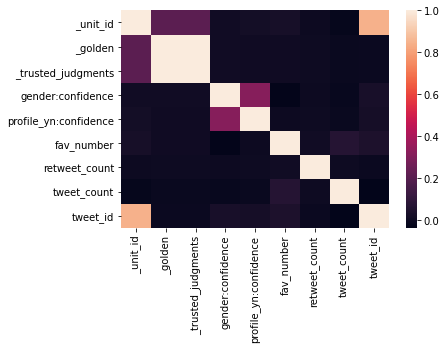

In [2]:
import seaborn as sb
sb.heatmap(df.corr(method='pearson'))

In [3]:
df['gender'].value_counts()
#everything balanced except 'unknown'.


female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [4]:
#dropping unknown.making new dataset df_drp_gend.
df_drp_gend1=df[df['gender']=='male']
df_drp_gend2=df[df['gender']=='female']
df_drp_gend3=df[df['gender']=='brand']
df_drp_gend=df_drp_gend1.append([df_drp_gend2,df_drp_gend3])
#feature selection.
df_drp_gend=df_drp_gend[['gender','gender:confidence','_golden','profile_yn','profile_yn:confidence','tweet_count','retweet_count','tweet_location','fav_number',]]
df_drp_gend.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20042
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 18836 non-null  object 
 1   gender:confidence      18836 non-null  float64
 2   _golden                18836 non-null  bool   
 3   profile_yn             18836 non-null  object 
 4   profile_yn:confidence  18836 non-null  float64
 5   tweet_count            18836 non-null  int64  
 6   retweet_count          18836 non-null  int64  
 7   tweet_location         11995 non-null  object 
 8   fav_number             18836 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 1.3+ MB


In [5]:
#(df_drp_gend['tweet_location'].value_counts())

In [6]:
# categorizing tweet_location.
USA=['usa','ca','fl','la','los angeles','ny','nyc,','new york','new york city','dc','washington','wa','il','chicago','ga','atlanta','california','florida','illinois','tx','texas','austin','san francisco','seattle','boston','ma','massachusetts','pa','philadelphia','houston','tn','tennessee','nashville','denver','co','az','phoenix','or','oh','nv','vegas','carolina','jersey','colorado','oregon','san','wi','michigan','ohio','miami','georgia','in','america','nj','missouri','detroit','indiana','nd','arizona','nc','utah','ok','virginia','ms','az','mi','louisiana','minnesota','ga','bay','rhode','nevada','baltimore','md','ok','kansas','ky','ut','mo','hollywood']
UK=['london','uk','united kingdom','england','bristol','surrey','gloucester','scotland','ireland','dublin','manchester','birmingham','glasgow','wales','leeds','essex','liverpool','derbyshire','sheffield','hampshire','equestria','cardiff','brighton','leicester','bristol','colchester','nottingham','southampton','belfast','somerset','peterborough','aberdeen','coventry','durham','cheshire']
CANADA=['canada','toronto','vancouver','montreal','vermont','alberta','bc','edmonton','halifax','ontario','quebec']
AFRICA=['lagos','nigeria','egypt','sa','africa','cape','johannesburg','pretoria','nairobi','kenya']
EUROPE=['germany','milan','brussels','belgium','italy','netherlands','norway','portugal','france','paris','belfast','sweden','switzerland','finland','slovakia','denmark','spain','barcelona','poland','chernobyl','venice','stockholm','amsterdam','petersburg','munich','deustchland','athens','zurich']
ASIA=['india','indonesia','singapore','israel','uae','arab','dubai','pakistan','karachi','delhi','hong','nadu','chennai','mumbai','maharashtra','jakarta','turkey','japan','banglore']
AUS_NZ=['australia','sydney','zealand','auckland','melbourne','wellington','']
for i in range(df_drp_gend.shape[0]):
    location=df_drp_gend['tweet_location'].values[i]
    group=''
    try:
        list_locations = location.lower().replace(',','').strip().split()
    except:
        group='Other'
        continue
    
    for j in list_locations:
        if j in USA:
            group='USA'
            break
        if j in UK:
            group='UK'
            break
        if j in CANADA:
            group='CANADA'
            break
        if j in EUROPE:
            group='EUROPE'#UK NOT INCLUDED BCS OF BREXIT.
            break
        if j in ASIA:
            group='ASIA'
            break
        else:
            group='Other'
            break
    df_drp_gend['tweet_location'].values[i]=group
    
        


In [7]:
print(df_drp_gend['tweet_location'].values[7501].lower().replace(',','').strip().split())

['usa']


In [8]:
#manual encoding for favourite number.(OPTIONAL)
#for i in range(df_drp_gend.shape[0]):
    #count=df_drp_gend['fav_number'].values[i]
    #group2=''
    #if count==0:
      #  group2=0
    #elif count//2==0:
     #   group2=2
    #else:
    #    group2=3
 #   df_drp_gend['fav_number'].values[i]=group2  
    
    

In [9]:
#categorization of tweet count in ranges.based on mean of the range.
for i in range(df_drp_gend.shape[0]):
    count=df_drp_gend['tweet_count'].values[i]
    if count<=50:
        group3=25
    elif count<=100:
        group3=50
    elif count<=500:
        group3=250
    elif count<=1000:
        group3=500
    elif count<=2500:
        group3=1250
    elif count<=5000:
        group3=2500
    elif count<=10000:
        group3=5000
    elif count<=20000:
        group3=10000
    elif count<=50000:
        group3=25000
    elif count<=100000:
        group3=50000
    elif count<=150000:
        group3=75000
    elif count<=175000:
        group3=87500
    elif count<=200000:
        group3=100000
    df_drp_gend['tweet_count'].values[i]=group3

In [10]:
df_drp_gend['tweet_count'].value_counts()

25000     3770
10000     2542
5000      2405
50000     2250
2500      1929
1250      1834
250       1330
500       1071
75000      646
25         432
50         267
87500      196
100000     164
Name: tweet_count, dtype: int64

In [11]:
df_drp_gend['tweet_location']=df_drp_gend['tweet_location'].fillna('Invalid/Unapplicable')

In [12]:
df_drp_gend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20042
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 18836 non-null  object 
 1   gender:confidence      18836 non-null  float64
 2   _golden                18836 non-null  bool   
 3   profile_yn             18836 non-null  object 
 4   profile_yn:confidence  18836 non-null  float64
 5   tweet_count            18836 non-null  int64  
 6   retweet_count          18836 non-null  int64  
 7   tweet_location         18836 non-null  object 
 8   fav_number             18836 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 1.3+ MB


In [13]:
dict(df_drp_gend['tweet_location'].value_counts())

{'Other': 8942,
 'Invalid/Unapplicable': 6841,
 'USA': 1632,
 'UK': 875,
 'CANADA': 244,
 'EUROPE': 185,
 'ASIA': 110,
 '': 7}

In [14]:
df_drp_gend #DATA ANALYSIS AND CLEANING COMPLETE.

,gender,gender:confidence,_golden,profile_yn,profile_yn:confidence,tweet_count,retweet_count,tweet_location,fav_number
0,male,1.0000,False,yes,1.0,75000,0,Other,0
1,male,1.0000,False,yes,1.0,5000,0,Invalid/Unapplicable,68
2,male,0.6625,False,yes,1.0,5000,1,Other,7696
3,male,1.0000,False,yes,1.0,1250,0,Other,202
7,male,1.0000,False,yes,1.0,75000,0,Invalid/Unapplicable,80
...,...,...,...,...,...,...,...,...,...
20030,brand,1.0000,True,yes,1.0,500,0,Other,137
20034,brand,1.0000,True,yes,1.0,2500,0,Other,192
20038,brand,0.8397,True,yes,1.0,5000,0,Invalid/Unapplicable,0
20041,brand,1.0000,True,yes,1.0,75000,0,USA,2


In [15]:
#fit transform
categoricals=list(set(df_drp_gend.columns)-set(df_drp_gend.describe().columns))
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categoricals:
    df_drp_gend[i]=le.fit_transform(df_drp_gend[i])

In [16]:
df_drp_gend.columns

Index(['gender', 'gender:confidence', '_golden', 'profile_yn',
       'profile_yn:confidence', 'tweet_count', 'retweet_count',
       'tweet_location', 'fav_number'],
      dtype='object')

In [17]:
# AI PART STARTS - SKLEARN
X=df_drp_gend[['gender:confidence', '_golden', 'profile_yn',
       'profile_yn:confidence', 'tweet_count', 'retweet_count',
       'tweet_location','fav_number',]].values
Y=df_drp_gend[['gender']].values
from sklearn.preprocessing import MinMaxScaler #NORMALIZATION
normalized=MinMaxScaler().fit_transform(X)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
svc=SVC()
X_train,X_test,Y_train,Y_test=train_test_split(normalized,Y,train_size=0.75)
svc.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)

c:\users\praty\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-17-f7f41a48e686>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


RandomForestClassifier()

In [42]:
Y_pred_rfc=rfc.predict(X_test)
Y_pred_svc=svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_svc))
accuracy_score(Y_test,Y_pred_rfc)


0.43894669781269907


0.47610957740496923

In [20]:
from sklearn.neural_network import MLPClassifier
opt='adam'
mlp=MLPClassifier(hidden_layer_sizes=(20,8),activation = 'relu',solver=opt,verbose=True)
mlp.fit(X_train,Y_train)

c:\users\praty\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.13367974
Iteration 2, loss = 1.09083700
Iteration 3, loss = 1.08664580
Iteration 4, loss = 1.08330059
Iteration 5, loss = 1.08039591
Iteration 6, loss = 1.07819479
Iteration 7, loss = 1.07549235
Iteration 8, loss = 1.07343760
Iteration 9, loss = 1.07154010
Iteration 10, loss = 1.06986898
Iteration 11, loss = 1.06789909
Iteration 12, loss = 1.06614049
Iteration 13, loss = 1.06446962
Iteration 14, loss = 1.06275699
Iteration 15, loss = 1.06109979
Iteration 16, loss = 1.05975051
Iteration 17, loss = 1.05851692
Iteration 18, loss = 1.05720085
Iteration 19, loss = 1.05582927
Iteration 20, loss = 1.05383338
Iteration 21, loss = 1.05260816
Iteration 22, loss = 1.05189810
Iteration 23, loss = 1.04958994
Iteration 24, loss = 1.04785892
Iteration 25, loss = 1.04776278
Iteration 26, loss = 1.04505488
Iteration 27, loss = 1.04370871
Iteration 28, loss = 1.04349281
Iteration 29, loss = 1.04124685
Iteration 30, loss = 1.03936241
Iteration 31, loss = 1.03882241
Iteration 32, los

c:\users\praty\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 8), verbose=True)

In [ ]:
y_pred_nn=mlp.predict(X_test)
accuracy_score(Y_test,y_pred_nn)

In [47]:
# Tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
tnflow=Sequential()
tnflow.add(Input(shape=(8,)),)
tnflow.add(Dense(40, activation='relu'),)
keras.layers.Dropout(rate=0.2) #1/5 random drops to avoid overfitting.
tnflow.add(Dense(20, activation='relu'),)
keras.layers.Dropout(rate=0.1)
tnflow.add(Dense(11, activation='relu'),)
tnflow.add(Dense(3, activation='softmax'),)
opt=keras.optimizers.Adam(learning_rate=0.008)
tnflow.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
tnflow.fit(X_train,Y_train,epochs=35,batch_size=64)




Epoch 1/35
221/221 [==============================] - 0s 886us/step - loss: 1.0776 - accuracy: 0.4093
Epoch 2/35
221/221 [==============================] - 0s 836us/step - loss: 1.0561 - accuracy: 0.4333
Epoch 3/35
221/221 [==============================] - 0s 868us/step - loss: 1.0376 - accuracy: 0.4435
Epoch 4/35
221/221 [==============================] - 0s 1ms/step - loss: 1.0244 - accuracy: 0.4533
Epoch 5/35
221/221 [==============================] - 0s 823us/step - loss: 1.0105 - accuracy: 0.4594
Epoch 6/35
221/221 [==============================] - 0s 868us/step - loss: 1.0066 - accuracy: 0.4640
Epoch 7/35
221/221 [==============================] - 0s 859us/step - loss: 1.0031 - accuracy: 0.4630
Epoch 8/35
221/221 [==============================] - 0s 859us/step - loss: 1.0021 - accuracy: 0.4658
Epoch 9/35
221/221 [==============================] - 0s 891us/step - loss: 0.9978 - accuracy: 0.4725
Epoch 10/35
221/221 [==============================] - 0s 864us/step - loss: 0.9945 